# Part 2: PRS

Since we are working with personally sensitive data from another individual ethically we can not publicly include or provide their full genetic data. However, we have provided reproducible steps so that any individual with their genetic data provided from 23andMe can reproduce the same analysis and evaluate their genetic risk predisposition.

In [1]:
# Imports our scripts
import scripts_prs as prs

## Steps for Converting your 23andMe Data

You will need to use the software bcftools and plink below to run the commands in the command line.

**Replication instructions:** replace "Tiffany" with your data.

1. Text to BCF
```
bcftools convert --tsv2vcf Tiffany_data.txt.gz -f ref2.fa -s Tiffany -Ob -o Tiffany.bcf
```
2. BCF to VCF
```
bcftools view Tiffany.bcf -Ov -o Tiffany.vcf
```

3. VCF to bim, bed, and fam
```
plink --vcf Tiffany.vcf --make-bed --out Tiffany
```

## Steps to Merge 1000 Genomes data with your Data

**Replication instructions:** replace "Tiffany" with your data.

Combine all the chromosome files together

```
plink --bfile LDREF/1000G.EUR.1 --merge-list merge_list.txt --make-bed --out 1000G_combined
```
Merge with your Data
```
plink --bfile 1000G_combined --bmerge yourData.bed Tiffany.bim Tiffany.fam --make-bed --out combined_with_Tiffany
```
Filter Big file to not include mismatching SNPs
```
plink --bfile 1000G_combined --exclude combined_with_Tiffany-merge.missnp --make-bed --out new_merge
```
Merge with your Data Again
```
plink --bfile new_merge --bmerge Tiffany.bed Tiffany.bim Tiffany.fam --make-bed --out final_combined
```

## Get Summary Stats for Intended Diseases

We choose 3 diseases or risk predispositions from the GWAS catelog: https://www.ebi.ac.uk/gwas/home.  
Here are our preprocessed GWAS files we selected:
- Alzhiemers: https://drive.google.com/file/d/1EL6ubS50S2MWTDKP1vLTQuvWQFpplYKk/view?usp=sharing
- Megastroke: https://drive.google.com/file/d/1EL6ubS50S2MWTDKP1vLTQuvWQFpplYKk/view?usp=sharing
- Bone Density and Fracture: https://drive.google.com/file/d/1Jd_vY8_pcI4pynkxjww4wAjati1aNsC-/view?usp=sharing

After getting the data from the GWAS catelog we used the below function to get the data ready for plink PRS command.

**Function desciption for replication:**
- First Argument: input file of downloaded GWAS data (This file should be located in `data` folder)
- Second Argument: how the required columns (SNP Id, First Allele, and Beta/effect size) are named in the GWAS data
- Third Argument: the output file name of the cleaned data (This file will be save to `results` folder)
- Fourth Argument: how the entries in the GWAS data are separated

In [2]:
# Alzheimer's Disease prep for PRS
prs.prepare_summary_stats_for_prs("alz_data.txt", ['SNP', 'A1', 'BETA'], "alz_data.gwas.txt", " ")

In [3]:
# Mega Stroke prep for PRS
prs.prepare_summary_stats_for_prs("megastroke.txt", ['MarkerName', 'Allele1', 'Effect'], "megastroke.gwas.txt", " ")

In [4]:
# Bone Density and Fracture prep for PRS
prs.prepare_summary_stats_for_prs("bone.txt", ['rs_number', 'reference_allele', 'beta'], "bone.gwas.txt", "\t")

## PRS plink commands

The below commands will take the prepared data files and create PRS scores for the individuals.

Plink Commands for Generating PRS Scores for each of the Traits



```
plink --bfile final_combined --score alz_data.gwas.txt 1 2 3 --out prs_for_alz
```

```
plink --bfile final_combined --score megastroke.gwas.txt 1 2 3 --out prs_for_mgs
```



```
plink --bfile final_combined --score bone.gwas.txt 1 2 3 --out prs_for_bone
```


## Our Analysis

After combining our mentor's genetic data with the 1000 Genomes individuals we were able to calculate the PRS values for different diseases and genetic predispositions.

**Function description for replication:**
- First Argument: name of the PRS results from PLINK (These files should be stored in the `profiles` folder)
- Second Argument: name for what you are analyzing the PRS values of
- Third Argument: Id of the individual you are trying to analyze

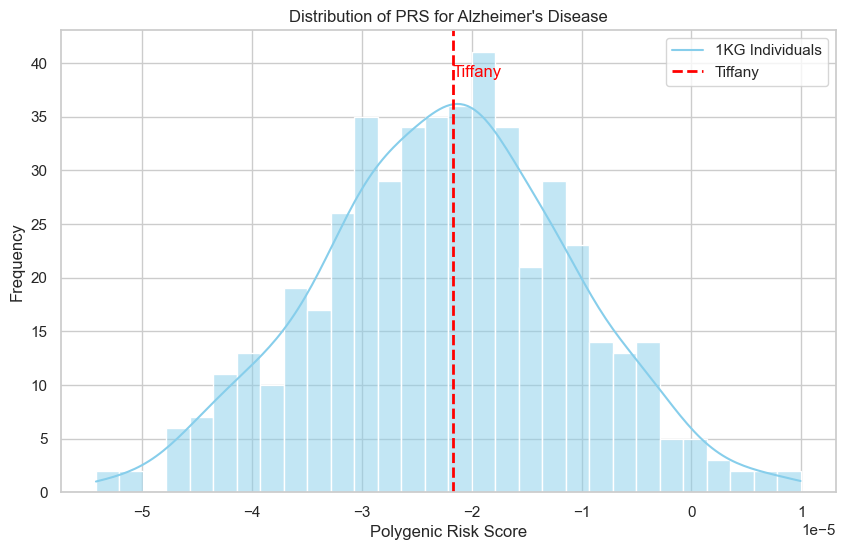

Tiffany falls in the 51.83673469387755 percentile


In [5]:
# PRS analysis of Alzheimer's Disease for our mentor
prs.plot_prs_dist("prs_for_alz", "Alzheimer's Disease", "Tiffany")

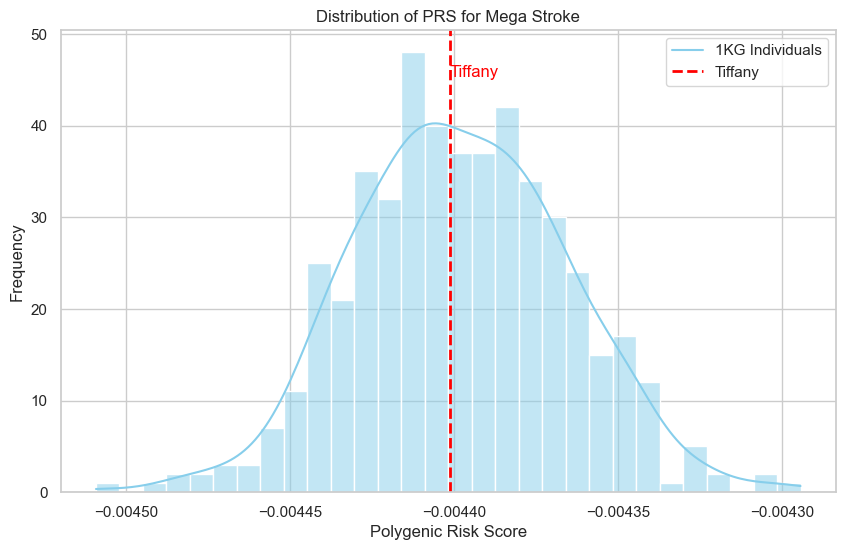

Tiffany falls in the 48.36734693877551 percentile


In [6]:
# PRS analysis of Mega Stroke for our mentor
prs.plot_prs_dist("prs_for_mgs", "Mega Stroke", "Tiffany")

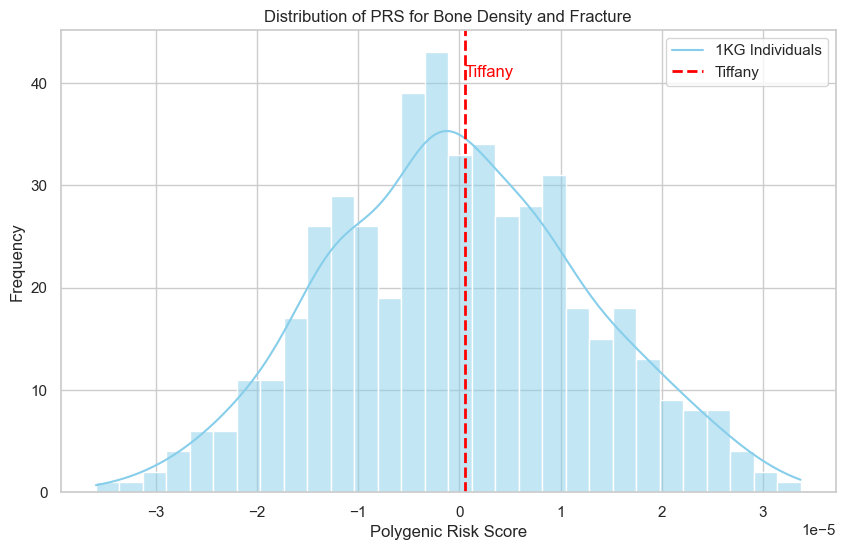

Tiffany falls in the 54.285714285714285 percentile


In [7]:
# PRS analysis of Bone Density and Fracture for our mentor
prs.plot_prs_dist("prs_for_bone", "Bone Density and Fracture", "Tiffany")